In [201]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplo
t as plt
import math
%matplotlib inline

In [202]:
#collect data
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
data.shape

(891, 12)

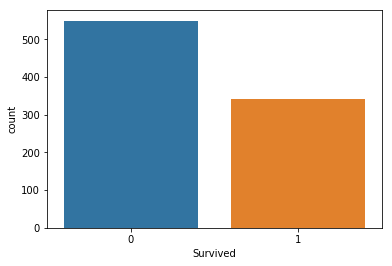

In [204]:
#Analyze data
sns.countplot(x='Survived',data=data)

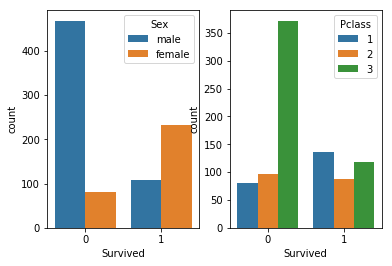

In [205]:
#Analyze data
plt.subplot(1,2,1)
sns.countplot(x='Survived',hue='Sex',data=data)
plt.subplot(1,2,2)
sns.countplot(x='Survived',hue='Pclass',data=data)

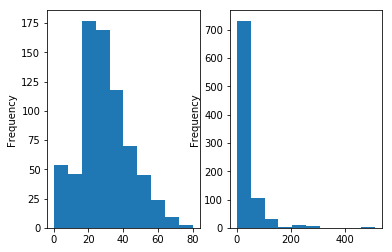

In [206]:
plt.subplot(1,2,1)
data['Age'].plot.hist()
plt.subplot(1,2,2)
data['Fare'].plot.hist()

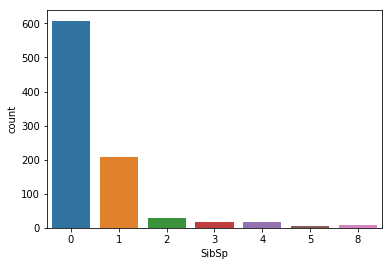

In [207]:
sns.countplot(x='SibSp',data=data)

In [208]:
#data wrangling
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [209]:
#remove record with null value
data.dropna(inplace=True)
data.shape

(183, 12)

In [210]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [211]:
#convert string value
sex=pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [212]:
#convert string value
Emb=pd.get_dummies(data['Embarked'],drop_first=True)
Emb.head()


,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [213]:
data=pd.concat([data,sex,Emb],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1


In [214]:
#remove features
#data.drop(['PassengerId','Name','Sex','Ticket','Embarked','Female',C])
data=data.drop(['PassengerId','Name','Sex','Ticket','Embarked','Parch','Cabin','SibSp'],axis=1)
data.head()

,Survived,Pclass,Age,Fare,male,Q,S
1,1,1,38.0,71.2833,0,0,0
3,1,1,35.0,53.1000,0,0,1
6,0,1,54.0,51.8625,1,0,1
10,1,3,4.0,16.7000,0,0,1
11,1,1,58.0,26.5500,0,0,1


In [215]:
#x:independent variable,y:dependent variable
x=data.drop('Survived',axis=1)
y=data['Survived']


In [216]:
#train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [217]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [219]:
predictions = logmodel.predict(x_test)

In [220]:
#precision
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.57      0.65      0.60        20\n           1       0.82      0.76      0.78        41\n\n   micro avg       0.72      0.72      0.72        61\n   macro avg       0.69      0.70      0.69        61\nweighted avg       0.73      0.72      0.73        61\n'

In [222]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[13,  7],
       [10, 31]], dtype=int64)

In [224]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)*100

72.1311475409836